Travel DataSet

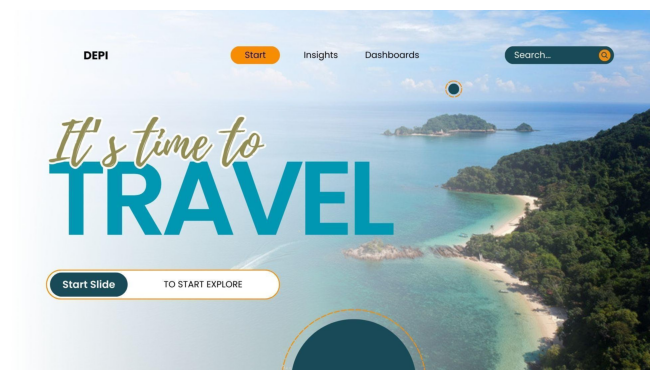

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

# open image
img = Image.open("C:\\Users\\hp\\OneDrive - Egyptian E-Learning University\\Desktop\\depi final project\\python analysis\\Green Orange Modern It's Time To Travel Presentation.jpg")

# show image without frame/padding
plt.imshow(img)
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # remove extra padding
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()
# save image without frame/padding
img.save("C:\\Users\\hp\\OneDrive - Egyptian E-Learning University\\Desktop\\depi final project\\python analysis\\Green Orange Modern It's Time To Travel Presentation.jpg", bbox_inches='tight', pad_inches=0)

In [19]:
# import libraries
import pandas as pd
import numpy as np

# read csv file
df = pd.read_csv('C:\\Users\\hp\\OneDrive - Egyptian E-Learning University\\Desktop\\depi final project\\python analysis\\final cleaned_travel_data.csv')

# show first few rows
df.head()

Id Destination  Start_date    End_date  Duration_days  Age  Gender  \
0   1      London  2023-05-01  2023-05-08              7   35    Male   
1   2      Phuket  2023-06-15  2023-05-09              5   28  Female   
2   3        Bali  2023-07-01  2023-05-10              7   45    Male   
3   4     NewYork  2023-08-15  2023-05-11             14   29  Female   
4   5       Tokyo  2023-09-10  2023-05-12              7   26  Female   

  Nationality Acc_type Transport_type  Accommodation_cost  \
0    American    Hotel       Airplane                1200   
1    Canadian   Resort       Airplane                 800   
2      Korean    Villa       Airplane                1000   
3     British    Hotel       Airplane                2000   
4  Vietnamese   Airbnb          Train                 700   

   Transportation_cost  total_cost  trip_year trip_month Demographics  \
0                  600        1800       2023        May        Adult   
1                  500        1300       2023       June  Young Adult   
2                  700        1700       2023       July  Middle Aged   
3                 1000        3000       2023     August  Young Adult   
4                  200         900       2023  September  Young Adult   

   Cost_per_day Trip_season  
0    257.142857      Spring  
1    260.000000      Spring  
2    242.857143      Summer  
3    214.285714      Summer  
4    128.571429      Summer

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   137 non-null    int64  
 1   Destination          137 non-null    object 
 2   Start_date           137 non-null    object 
 3   End_date             137 non-null    object 
 4   Duration_days        137 non-null    int64  
 5   Age                  137 non-null    int64  
 6   Gender               137 non-null    object 
 7   Nationality          137 non-null    object 
 8   Acc_type             137 non-null    object 
 9   Transport_type       137 non-null    object 
 10  Accommodation_cost   137 non-null    int64  
 11  Transportation_cost  137 non-null    int64  
 12  total_cost           137 non-null    int64  
 13  trip_year            137 non-null    int64  
 14  trip_month           137 non-null    object 
 15  Demographics         137 non-null    obj

In [21]:
df.describe()

Id  Duration_days         Age  Accommodation_cost  \
count  137.000000     137.000000  137.000000          137.000000   
mean    69.000000       7.605839   33.175182         1245.109489   
std     39.692569       1.601276    7.145441         1337.349836   
min      1.000000       5.000000   20.000000          100.000000   
25%     35.000000       7.000000   28.000000          600.000000   
50%     69.000000       7.000000   31.000000          900.000000   
75%    103.000000       8.000000   38.000000         1200.000000   
max    137.000000      14.000000   60.000000         8000.000000   

       Transportation_cost    total_cost    trip_year  Cost_per_day  
count           137.000000    137.000000   137.000000    137.000000  
mean            640.474453   1885.583942  2023.299270    262.256062  
std             584.926429   1834.245223     0.519685    278.056124  
min               0.000000    100.000000  2022.000000     14.285714  
25%             200.000000   1000.000000  2023.000000    130.000000  
50%             500.000000   1400.000000  2023.000000    185.714286  
75%             800.000000   1900.000000  2024.000000    260.000000  
max            3000.000000  10500.000000  2024.000000   1500.000000

In [22]:
df.shape

(137, 18)

data cleaning

In [23]:
# Handling duplicates
df.duplicated().sum()

np.int64(0)

In [24]:
# remove
df_clean = df.drop_duplicates().reset_index(drop = True)

In [25]:
df_clean.duplicated().sum()

np.int64(0)

Checking missing values

In [26]:
df.isnull().sum()

Id                     0
Destination            0
Start_date             0
End_date               0
Duration_days          0
Age                    0
Gender                 0
Nationality            0
Acc_type               0
Transport_type         0
Accommodation_cost     0
Transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
Demographics           0
Cost_per_day           0
Trip_season            0
dtype: int64

In [27]:
# Step 1: Clean column names (remove spaces, lowercase, replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns after cleaning:", df.columns.tolist())

# Step 2: Fill missing values for 'start_date' using mode
col_name = 'start_date'
if col_name in df.columns:
    df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
else:
    print("Column 'start_date' not found!")

# Step 3: Optional - verify missing values
if col_name in df.columns:
    print(df[col_name].isnull().sum())
else:
    print("No start_date column to check for missing values.")


Columns after cleaning: ['id', 'destination', 'start_date', 'end_date', 'duration_days', 'age', 'gender', 'nationality', 'acc_type', 'transport_type', 'accommodation_cost', 'transportation_cost', 'total_cost', 'trip_year', 'trip_month', 'demographics', 'cost_per_day', 'trip_season']
0


In [28]:
df.isnull().sum()

id                     0
destination            0
start_date             0
end_date               0
duration_days          0
age                    0
gender                 0
nationality            0
acc_type               0
transport_type         0
accommodation_cost     0
transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
demographics           0
cost_per_day           0
trip_season            0
dtype: int64

In [29]:

# Fill missing values for 'start date' using mode
if 'end date' in df.columns:
    df['end date'] = df['end date'].fillna(df['end date'].mode()[0])
else:
    print("Column 'end date' not found!")

df.isnull().sum()


Column 'end date' not found!


id                     0
destination            0
start_date             0
end_date               0
duration_days          0
age                    0
gender                 0
nationality            0
acc_type               0
transport_type         0
accommodation_cost     0
transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
demographics           0
cost_per_day           0
trip_season            0
dtype: int64

In [30]:
# Fill missing values for 'start date' using mode
if 'destination' in df.columns:
    df['destination'] = df['destination'].fillna(df['destination'].mode()[0])
else:
    print("Column 'destination' not found!")

df.isnull().sum()

id                     0
destination            0
start_date             0
end_date               0
duration_days          0
age                    0
gender                 0
nationality            0
acc_type               0
transport_type         0
accommodation_cost     0
transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
demographics           0
cost_per_day           0
trip_season            0
dtype: int64

In [31]:
rows_with_missing = df[df.isnull().any(axis = 1)]
rows_with_missing

Empty DataFrame
Columns: [id, destination, start_date, end_date, duration_days, age, gender, nationality, acc_type, transport_type, accommodation_cost, transportation_cost, total_cost, trip_year, trip_month, demographics, cost_per_day, trip_season]
Index: []

In [32]:
# Fill missing values for 'start date' using mode
if 'duration (days)' in df.columns:
    df['duration (days)'] = df['duration (days)'].fillna(df['duration (days)'].mode()[0])
else:
    print("Column 'duration (days)' not found!")

df.isnull().sum()

Column 'duration (days)' not found!


id                     0
destination            0
start_date             0
end_date               0
duration_days          0
age                    0
gender                 0
nationality            0
acc_type               0
transport_type         0
accommodation_cost     0
transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
demographics           0
cost_per_day           0
trip_season            0
dtype: int64

In [37]:
# Example for 'transportation cost'
df['transportation_cost'] = df['transportation_cost'].replace(
    '[\$,USD, ]', '', regex=True
)
df['transportation_cost'] = pd.to_numeric(df['transportation_cost'], errors='coerce')

In [38]:
# Fill missing numeric column 'transportation cost' with median
col_name = 'transportation cost'

if col_name in df.columns:
    median_value = df[col_name].median()  # calculate median
    df[col_name] = df[col_name].fillna(median_value)
    print(f"Missing values in '{col_name}' filled with median: {median_value}")
else:
    print(f"Column '{col_name}' not found!")

# Check remaining missing values
print(df.isnull().sum())


Column 'transportation cost' not found!
id                     0
destination            0
start_date             0
end_date               0
duration_days          0
age                    0
gender                 0
nationality            0
acc_type               0
transport_type         0
accommodation_cost     0
transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
demographics           0
cost_per_day           0
trip_season            0
dtype: int64


In [39]:
rows_with_missing = df[df.isnull().any(axis = 1)]
rows_with_missing

Empty DataFrame
Columns: [id, destination, start_date, end_date, duration_days, age, gender, nationality, acc_type, transport_type, accommodation_cost, transportation_cost, total_cost, trip_year, trip_month, demographics, cost_per_day, trip_season]
Index: []

In [43]:
df['transport_type'] = df['transport_type'].fillna("Flight")

In [44]:
df.isnull().sum()

id                     0
destination            0
start_date             0
end_date               0
duration_days          0
age                    0
gender                 0
nationality            0
acc_type               0
transport_type         0
accommodation_cost     0
transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
demographics           0
cost_per_day           0
trip_season            0
dtype: int64

In [46]:
# import libraries
import pandas as pd
import numpy as np

# read csv file
dft = pd.read_csv('final cleaned_travel_data.csv')

# show first few rows
dft.head()

Id Destination  Start_date    End_date  Duration_days  Age  Gender  \
0   1      London  2023-05-01  2023-05-08              7   35    Male   
1   2      Phuket  2023-06-15  2023-05-09              5   28  Female   
2   3        Bali  2023-07-01  2023-05-10              7   45    Male   
3   4     NewYork  2023-08-15  2023-05-11             14   29  Female   
4   5       Tokyo  2023-09-10  2023-05-12              7   26  Female   

  Nationality Acc_type Transport_type  Accommodation_cost  \
0    American    Hotel       Airplane                1200   
1    Canadian   Resort       Airplane                 800   
2      Korean    Villa       Airplane                1000   
3     British    Hotel       Airplane                2000   
4  Vietnamese   Airbnb          Train                 700   

   Transportation_cost  total_cost  trip_year trip_month Demographics  \
0                  600        1800       2023        May        Adult   
1                  500        1300       2023       June  Young Adult   
2                  700        1700       2023       July  Middle Aged   
3                 1000        3000       2023     August  Young Adult   
4                  200         900       2023  September  Young Adult   

   Cost_per_day Trip_season  
0    257.142857      Spring  
1    260.000000      Spring  
2    242.857143      Summer  
3    214.285714      Summer  
4    128.571429      Summer

In [47]:
dft.isnull().sum()

Id                     0
Destination            0
Start_date             0
End_date               0
Duration_days          0
Age                    0
Gender                 0
Nationality            0
Acc_type               0
Transport_type         0
Accommodation_cost     0
Transportation_cost    0
total_cost             0
trip_year              0
trip_month             0
Demographics           0
Cost_per_day           0
Trip_season            0
dtype: int64

In [48]:

dft.info()
dft.describe()
dft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   137 non-null    int64  
 1   Destination          137 non-null    object 
 2   Start_date           137 non-null    object 
 3   End_date             137 non-null    object 
 4   Duration_days        137 non-null    int64  
 5   Age                  137 non-null    int64  
 6   Gender               137 non-null    object 
 7   Nationality          137 non-null    object 
 8   Acc_type             137 non-null    object 
 9   Transport_type       137 non-null    object 
 10  Accommodation_cost   137 non-null    int64  
 11  Transportation_cost  137 non-null    int64  
 12  total_cost           137 non-null    int64  
 13  trip_year            137 non-null    int64  
 14  trip_month           137 non-null    object 
 15  Demographics         137 non-null    obj

Id Destination  Start_date    End_date  Duration_days  Age  Gender  \
0   1      London  2023-05-01  2023-05-08              7   35    Male   
1   2      Phuket  2023-06-15  2023-05-09              5   28  Female   
2   3        Bali  2023-07-01  2023-05-10              7   45    Male   
3   4     NewYork  2023-08-15  2023-05-11             14   29  Female   
4   5       Tokyo  2023-09-10  2023-05-12              7   26  Female   

  Nationality Acc_type Transport_type  Accommodation_cost  \
0    American    Hotel       Airplane                1200   
1    Canadian   Resort       Airplane                 800   
2      Korean    Villa       Airplane                1000   
3     British    Hotel       Airplane                2000   
4  Vietnamese   Airbnb          Train                 700   

   Transportation_cost  total_cost  trip_year trip_month Demographics  \
0                  600        1800       2023        May        Adult   
1                  500        1300       2023       June  Young Adult   
2                  700        1700       2023       July  Middle Aged   
3                 1000        3000       2023     August  Young Adult   
4                  200         900       2023  September  Young Adult   

   Cost_per_day Trip_season  
0    257.142857      Spring  
1    260.000000      Spring  
2    242.857143      Summer  
3    214.285714      Summer  
4    128.571429      Summer

In [49]:
from ydata_profiling import ProfileReport
profile = ProfileReport(dft, title="Customer Data Profile Report",explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 411.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Step 1: Import libraries

In [50]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
# Step 2: Load dataset
df = pd.read_csv('final cleaned_travel_data.csv') 
# Optional: prettier plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

Step 2: Check the Data Quality

In [52]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   137 non-null    int64  
 1   Destination          137 non-null    object 
 2   Start_date           137 non-null    object 
 3   End_date             137 non-null    object 
 4   Duration_days        137 non-null    int64  
 5   Age                  137 non-null    int64  
 6   Gender               137 non-null    object 
 7   Nationality          137 non-null    object 
 8   Acc_type             137 non-null    object 
 9   Transport_type       137 non-null    object 
 10  Accommodation_cost   137 non-null    int64  
 11  Transportation_cost  137 non-null    int64  
 12  total_cost           137 non-null    int64  
 13  trip_year            137 non-null    int64  
 14  trip_month           137 non-null    object 
 15  Demographics         137 non-null    obj

3RD Convert to datetime format FOR START AND END DATE 

In [54]:
# Convert both columns to datetime
df["Start_date"] = pd.to_datetime(df["Start_date"], errors='coerce')
df["End_date"] = pd.to_datetime(df["End_date"], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   137 non-null    int64         
 1   Destination          137 non-null    object        
 2   Start_date           137 non-null    datetime64[ns]
 3   End_date             137 non-null    datetime64[ns]
 4   Duration_days        137 non-null    int64         
 5   Age                  137 non-null    int64         
 6   Gender               137 non-null    object        
 7   Nationality          137 non-null    object        
 8   Acc_type             137 non-null    object        
 9   Transport_type       137 non-null    object        
 10  Accommodation_cost   137 non-null    int64         
 11  Transportation_cost  137 non-null    int64         
 12  total_cost           137 non-null    int64         
 13  trip_year            137 non-null  

Step 3: Create Derived Columns (if not already there)

You already have useful columns (total_cost, trip_year, trip_month), but add more if needed:

In [56]:
# Step 3: Create Derived Columns (if not already there)
df["Cost_per_day"] = df["total_cost"] / df["Duration_days"]
df["Trip_season"] = pd.cut(df["Start_date"].dt.month,
                           bins=[0, 3, 6, 9, 12],
                           labels=["Winter", "Spring", "Summer", "Autumn"])

Index(['Id', 'Destination', 'Start_date', 'End_date', 'Duration_days', 'Age',
       'Gender', 'Nationality', 'Acc_type', 'Transport_type',
       'Accommodation_cost', 'Transportation_cost', 'total_cost', 'trip_year',
       'trip_month', 'Demographics', 'Cost_per_day', 'Trip_season'],
      dtype='object')


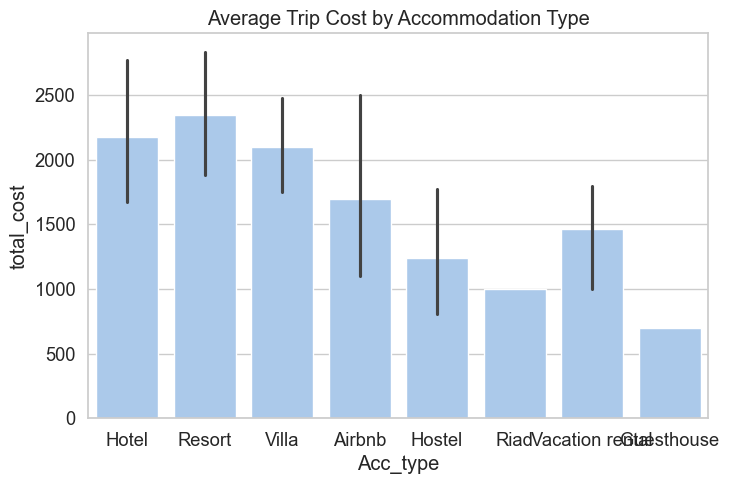

In [58]:
#Fix Option 1 — Clean your column names first

#ight after loading your dataset, add this:

# Clean all column names (remove spaces before/after words)
df.columns = df.columns.str.strip()

# Optional: check column names
print(df.columns)


#Then your plotting line should be:

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Acc_type", y="total_cost", estimator=np.mean)
plt.title("Average Trip Cost by Accommodation Type")
plt.show()

In [59]:
df.columns = df.columns.str.strip()


In [60]:
print(df.columns.tolist())


['Id', 'Destination', 'Start_date', 'End_date', 'Duration_days', 'Age', 'Gender', 'Nationality', 'Acc_type', 'Transport_type', 'Accommodation_cost', 'Transportation_cost', 'total_cost', 'trip_year', 'trip_month', 'Demographics', 'Cost_per_day', 'Trip_season']


In [61]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.columns.tolist())

['Id', 'Destination', 'Start_date', 'End_date', 'Duration_days', 'Age', 'Gender', 'Nationality', 'Acc_type', 'Transport_type', 'Accommodation_cost', 'Transportation_cost', 'total_cost', 'trip_year', 'trip_month', 'Demographics', 'Cost_per_day', 'Trip_season']


In [62]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("__", "_")
print(df.columns.tolist())


['Id', 'Destination', 'Start_date', 'End_date', 'Duration_days', 'Age', 'Gender', 'Nationality', 'Acc_type', 'Transport_type', 'Accommodation_cost', 'Transportation_cost', 'total_cost', 'trip_year', 'trip_month', 'Demographics', 'Cost_per_day', 'Trip_season']


convert plane to airplane

In [63]:
df['Transport_type'] = df['Transport_type'].replace(
    ['Flight', 'flight', 'Plane', 'plane'], 'Airplane'
)
print(df['Transport_type'].unique())

['Airplane' 'Train' 'Bus' 'Car rental' 'Subway' 'Car' 'Unknown' 'Ferry']


In [64]:
df['Destination'] = df['Destination'].replace(
    ['New'], 'NewYork'
)
print(df['Destination'].unique())

['London' 'Phuket' 'Bali' 'NewYork' 'Tokyo' 'Paris' 'Sydney' 'Rio'
 'Amsterdam' 'Dubai' 'Cancun' 'Barcelona' 'Honolulu' 'Berlin' 'Marrakech'
 'Edinburgh' 'Rome' 'Bangkok' 'Hawaii' 'Japan' 'Thailand' 'France'
 'Australia' 'Brazil' 'Greece' 'Egypt' 'Mexico' 'Italy' 'Spain' 'Canada'
 'Vancouver' 'Seoul' 'Los' 'Cape' 'Santorini' 'Phnom' 'Athens' 'Auckland']


In [66]:

# Dictionary: Country → Nationality
country_to_nationality = {
    "USA": "American", "Usa": "American", "United States": "American",
    "American": "American",

    "UK": "British", "United Kingdom": "British", "Britain": "British",
    "British": "British",

    "Canada": "Canadian", "Canadian": "Canadian",

    "Italy": "Italian", "Italia": "Italian", "Italian": "Italian",

    "Spain": "Spanish", "Spanish": "Spanish",

    "Brazil": "Brazilian", "Brazilian": "Brazilian",

    "Germany": "German", "German": "German",

    "France": "French", "French": "French",

    "India": "Indian", "Indian": "Indian",

    "China": "Chinese", "Chinese": "Chinese",

    "Japan": "Japanese", "Japanese": "Japanese",

    "Korea": "Korean", "South Korea": "Korean", "Korean": "Korean",

    "Morocco": "Moroccan", "Moroccan": "Moroccan",

    "Netherlands": "Dutch", "Dutch": "Dutch",

    "Australia": "Australian", "Australian": "Australian",

    "Vietnam": "Vietnamese", "Vietnamese": "Vietnamese",

    "Indonesia": "Indonesian", "Indonesian": "Indonesian",

    "South Africa": "South African", "South african": "South African",

    "UAE": "Emirati", "United Arab Emirates": "Emirati", "Emirati": "Emirati",

    "Greece": "Greek", "Greek": "Greek",

    "Singapore": "Singaporean", "Singaporean": "Singaporean",

    "Taiwan": "Taiwanese", "Taiwanese": "Taiwanese",

    "Hong Kong": "Hong Konger", "Hong kong": "Hong Konger",

    "New Zealand": "New Zealander", "New zealander": "New Zealander"
}

# Standardize capitalization before mapping
df["Nationality"] = df["Nationality"].str.strip().str.title()

# Convert countries → nationalities
df["Nationality"] = df["Nationality"].replace(country_to_nationality)

# Save result
df.to_csv("FINAL_version_cleaned_travel_data.csv", index=False)

print("Nationality column cleaned successfully!")


Nationality column cleaned successfully!


Step 4: Exploratory Data Analysis (EDA)

Destination
Paris        14
Bali         12
Tokyo        12
Sydney       12
NewYork      10
Rome          9
Bangkok       8
London        7
Barcelona     6
Rio           5
Name: count, dtype: int64
Gender
Female    70
Male      67
Name: count, dtype: int64
trip_year
2022    1162.500000
2023    1927.272727
2024    1868.333333
Name: total_cost, dtype: float64


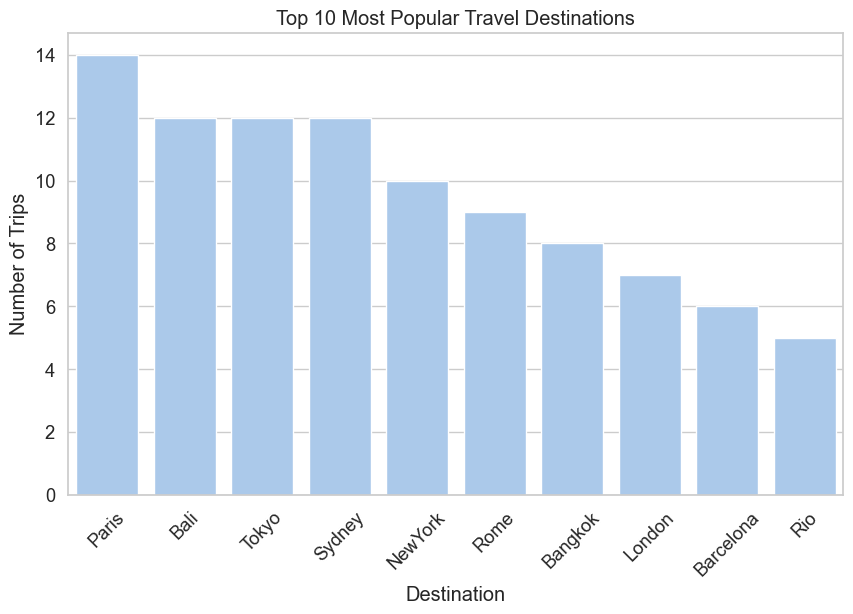

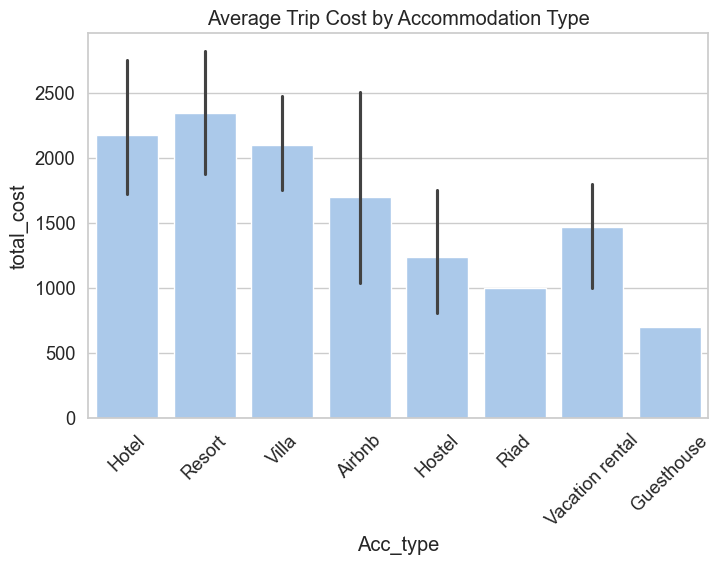

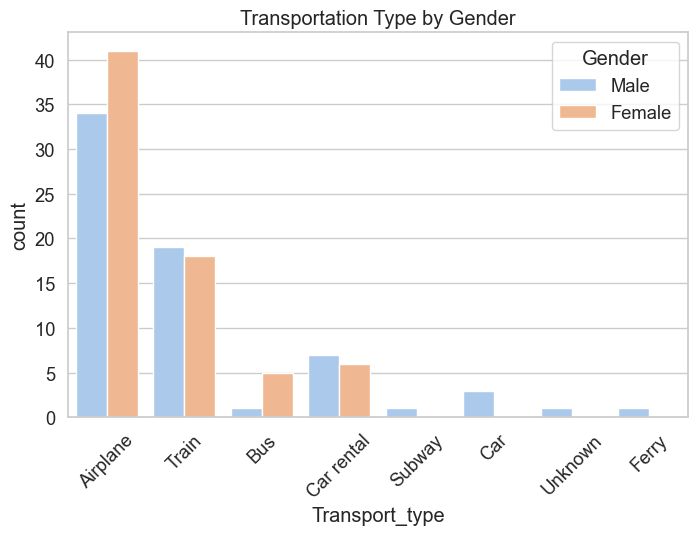

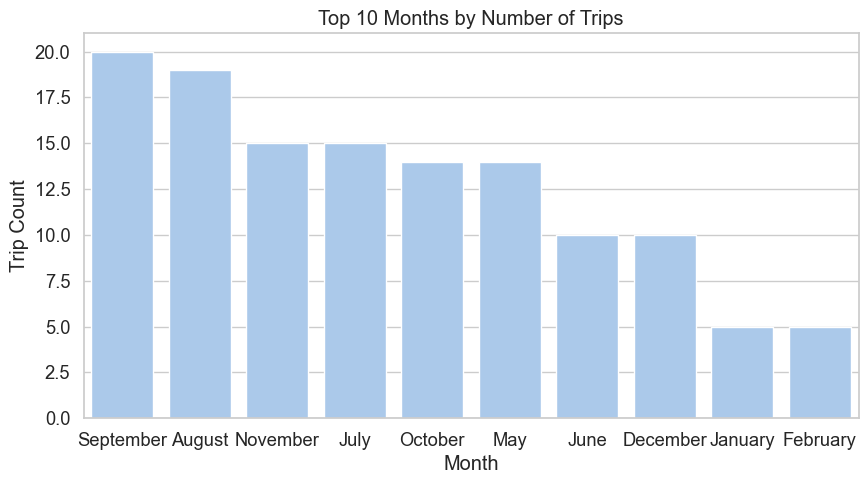

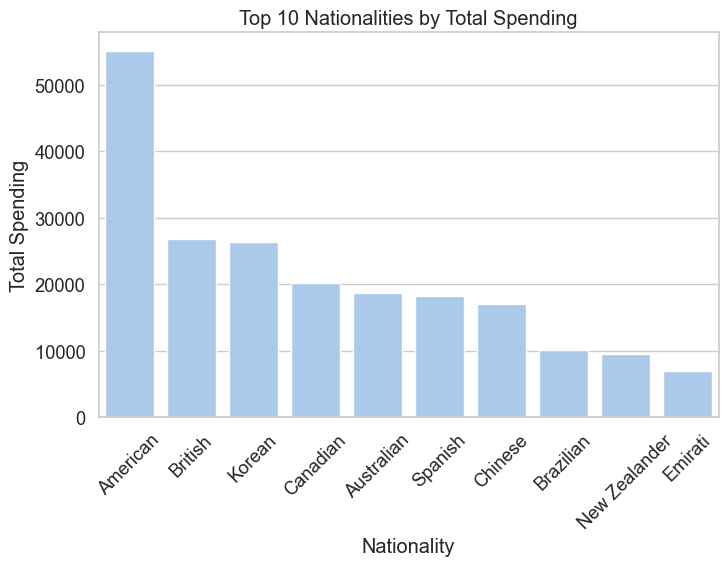

In [67]:
# 4.1 Overview
print(df["Destination"].value_counts().head(10))
print(df["Gender"].value_counts())
print(df.groupby("trip_year")["total_cost"].mean())

# تنظيف أسماء الأعمدة (للتأكد من خلوها من مسافات)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("__", "_")

# تمكين عرض الرسومات داخل الخلية
%matplotlib inline

# 4.2 Visualize Key Trends

# 🔹 Top 10 Destinations
plt.figure(figsize=(10,6))
top_dest = df["Destination"].value_counts().head(10)
sns.barplot(x=top_dest.index, y=top_dest.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Travel Destinations")
plt.xlabel("Destination")
plt.ylabel("Number of Trips")
plt.show()

# 🔹 Average Trip Cost by Accommodation Type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Acc_type", y="total_cost", estimator=np.mean)
plt.title("Average Trip Cost by Accommodation Type")
plt.xticks(rotation=45)
plt.show()

# 🔹 Transportation Preference by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Transport_type", hue="Gender")
plt.title("Transportation Type by Gender")
plt.xticks(rotation=45)
plt.show()

# 🔹 Top 10 Months by Trip Count
plt.figure(figsize=(10,5))
top_months = df["trip_month"].value_counts().head(10)
sns.barplot(x=top_months.index, y=top_months.values)
plt.title("Top 10 Months by Number of Trips")
plt.xlabel("Month")
plt.ylabel("Trip Count")
plt.show()

# 🔹 Top 10 Nationalities by Total Spending
top_nat = df.groupby("Nationality")["total_cost"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_nat.index, y=top_nat.values)
plt.title("Top 10 Nationalities by Total Spending")
plt.xticks(rotation=45)
plt.ylabel("Total Spending")
plt.show()


Step 5: Statistical & Correlation Analysis

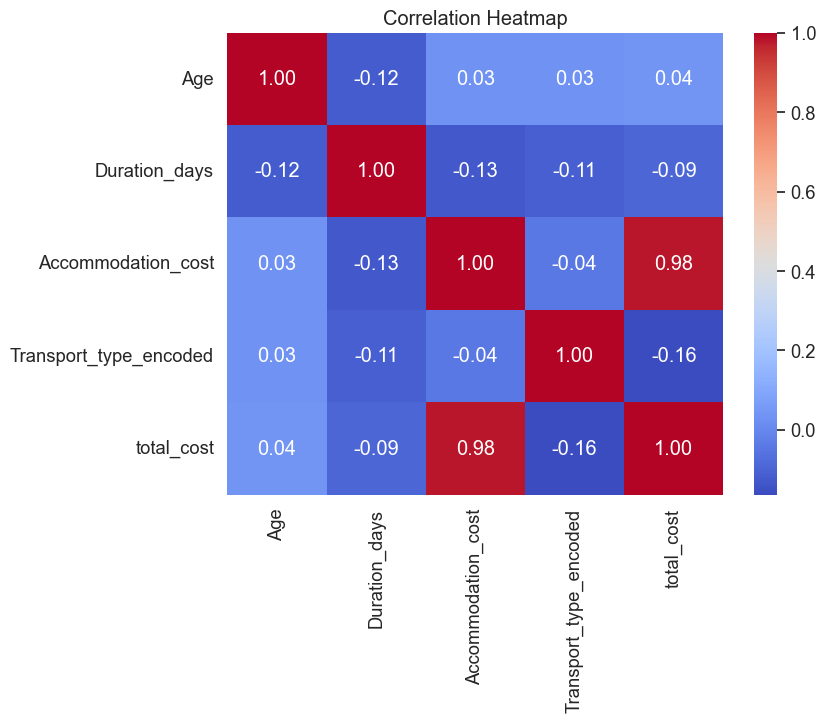

In [68]:

df["Transport_type_encoded"] = df["Transport_type"].astype("category").cat.codes

# حساب معامل الارتباط بين الأعمدة الرقمية فقط
corr = df[["Age", "Duration_days", "Accommodation_cost", "Transport_type_encoded", "total_cost"]].corr()

# رسم خريطة الارتباط
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# ✅ STEP 6: Insights & Storytelling Ideas

In [70]:

# Ensure column names are clean
df.columns = df.columns.str.strip()

print("🔹 STEP 6: Insights & Storytelling\n")

# 💰 Top spending destinations
top_spending = (
    df.groupby("Destination")["Cost_per_day"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("💰 Top Spending Destinations:")
for dest, cost in top_spending.items():
    print(f"   • {dest}: {cost:.2f} per day")
print()

# ✈️ Most common transport
common_transport = df["Transport_type"].value_counts().idxmax()
print(f"✈️ Most Common Transport: {common_transport}")
print()

# 🏨 Accommodation preference by age group
if "Demographics" in df.columns:
    acc_pref = df.groupby("Demographics")["Acc_type"].agg(lambda x: x.value_counts().idxmax())
    print("🏨 Preferred Accommodation by Demographics:")
    for demo, acc in acc_pref.items():
        print(f"   • {demo}: prefers {acc}")
    print()

# 📅 Seasonality trends
month_counts = df["trip_month"].value_counts().sort_index()
most_common_months = month_counts.head(3).index.tolist()
print(f"📅 Peak Travel Months: {', '.join(map(str, most_common_months))}")
print()

# 🌍 Nationality spending trends
nat_spending = (
    df.groupby("Nationality")["total_cost"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("🌍 Top Nationalities by Average Trip Cost:")
for nat, avg in nat_spending.items():
    print(f"   • {nat}: {avg:.2f} average total cost")
print()

print("✨ Storytelling Summary:")
print("• Travellers to expensive destinations like the above tend to spend more per day.")
print(f"• {common_transport} is the dominant mode of transport among travelers.")
print("• Accommodation choices vary by demographic group, as seen above.")
print("• Travel peaks in specific months, suggesting seasonal preferences.")
print("• Certain nationalities consistently spend more on travel overall.")


🔹 STEP 6: Insights & Storytelling

💰 Top Spending Destinations:
   • Paris: 4642.90 per day
   • NewYork: 3724.76 per day
   • Sydney: 3664.91 per day
   • Bali: 3011.96 per day
   • Tokyo: 2745.36 per day

✈️ Most Common Transport: Airplane

🏨 Preferred Accommodation by Demographics:
   • Adult: prefers Hotel
   • Middle Aged: prefers Hotel
   • Senior: prefers Hotel
   • Young Adult: prefers Airbnb

📅 Peak Travel Months: April, August, December

🌍 Top Nationalities by Average Trip Cost:
   • American: 55100.00 average total cost
   • British: 26800.00 average total cost
   • Korean: 26300.00 average total cost
   • Canadian: 20200.00 average total cost
   • Australian: 18625.00 average total cost

✨ Storytelling Summary:
• Travellers to expensive destinations like the above tend to spend more per day.
• Airplane is the dominant mode of transport among travelers.
• Accommodation choices vary by demographic group, as seen above.
• Travel peaks in specific months, suggesting seasonal pr

Step 7: Professional Visualization Dashboard (Optional)

Use Plotly or Seaborn + Matplotlib for interactive visuals.

In [71]:

import plotly.express as px

fig = px.bar(df, x="Destination", y="total_cost", color="Gender",
             title="Total Cost by Destination and Gender")
fig.show()        

In [72]:


# Clean column names (just in case)
df.columns = df.columns.str.strip()

# 💰 1. Total Cost by Destination and Gender
fig1 = px.bar(
    df,
    x="Destination",
    y="total_cost",
    color="Gender",
    title="💰 Total Cost by Destination and Gender",
    barmode="group",
)
fig1.update_layout(xaxis_title="Destination", yaxis_title="Total Cost (USD)")
fig1.show()

# 🏨 2. Average Trip Cost by Accommodation Type
fig2 = px.box(
    df,
    x="Acc_type",
    y="total_cost",
    color="Acc_type",
    title="🏨 Average Trip Cost by Accommodation Type",
)
fig2.update_layout(xaxis_title="Accommodation Type", yaxis_title="Total Trip Cost (USD)")
fig2.show()

# ✈️ 3. Transportation Type by Gender
fig3 = px.histogram(
    df,
    x="Transport_type",
    color="Gender",
    title="✈️ Transportation Preference by Gender",
    barmode="group",
)
fig3.update_layout(xaxis_title="Transport Type", yaxis_title="Number of Trips")
fig3.show()

# 📅 4. Trips Over Time by Month
fig4 = px.histogram(
    df,
    x="trip_month",
    color="Trip_season",
    title="📅 Monthly Trips by Season",
)
fig4.update_layout(xaxis_title="Month", yaxis_title="Number of Trips")
fig4.show()

# 🌍 5. Nationality vs. Average Total Cost
avg_nat_cost = df.groupby("Nationality", as_index=False)["total_cost"].mean()
fig5 = px.bar(
    avg_nat_cost.sort_values(by="total_cost", ascending=False).head(10),
    x="Nationality",
    y="total_cost",
    color="total_cost",
    title="🌍 Top 10 Nationalities by Average Trip Cost",
    color_continuous_scale="Viridis",
)
fig5.update_layout(xaxis_title="Nationality", yaxis_title="Average Total Cost (USD)")
fig5.show()


Destination
Paris        14
Bali         12
Tokyo        12
Sydney       12
NewYork      10
Rome          9
Bangkok       8
London        7
Barcelona     6
Rio           5
Name: count, dtype: int64
Gender
Female    70
Male      67
Name: count, dtype: int64
trip_year
2022    1162.500000
2023    1927.272727
2024    1868.333333
Name: total_cost, dtype: float64


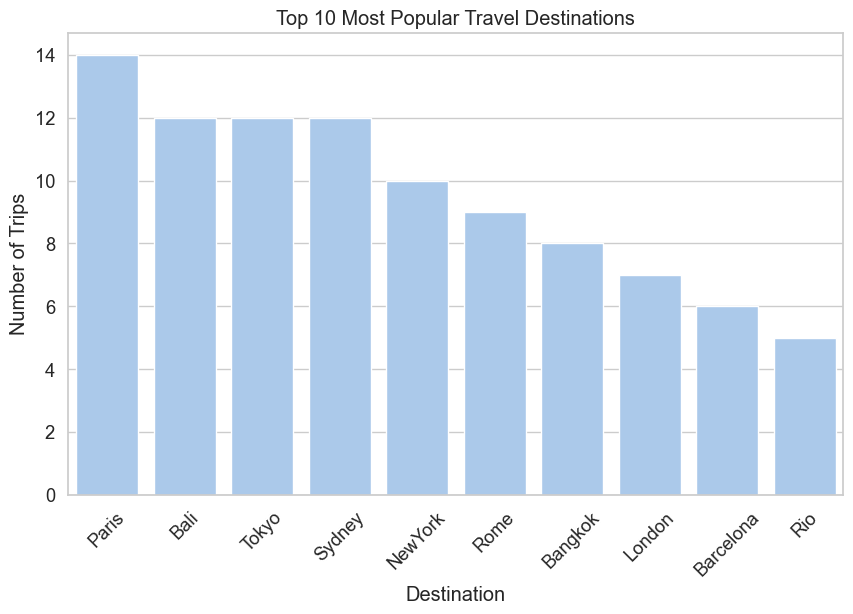

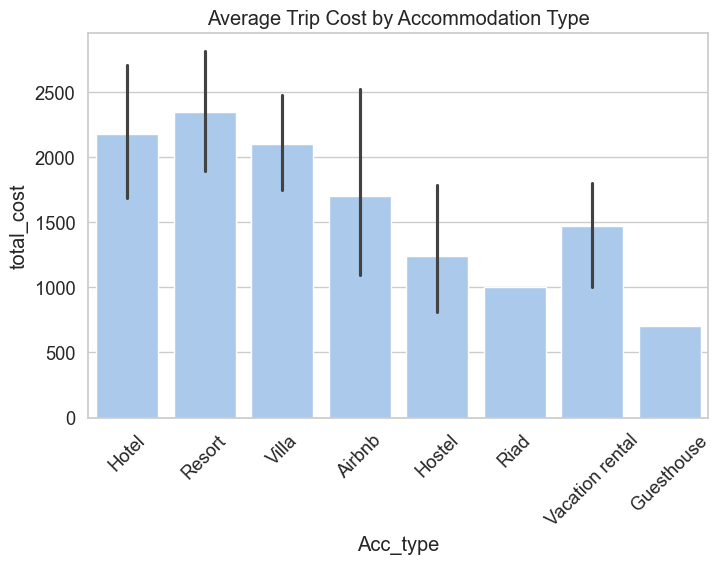

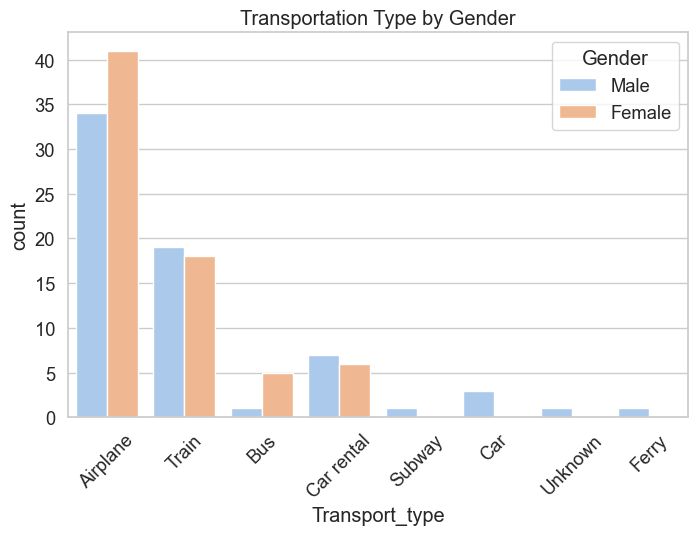

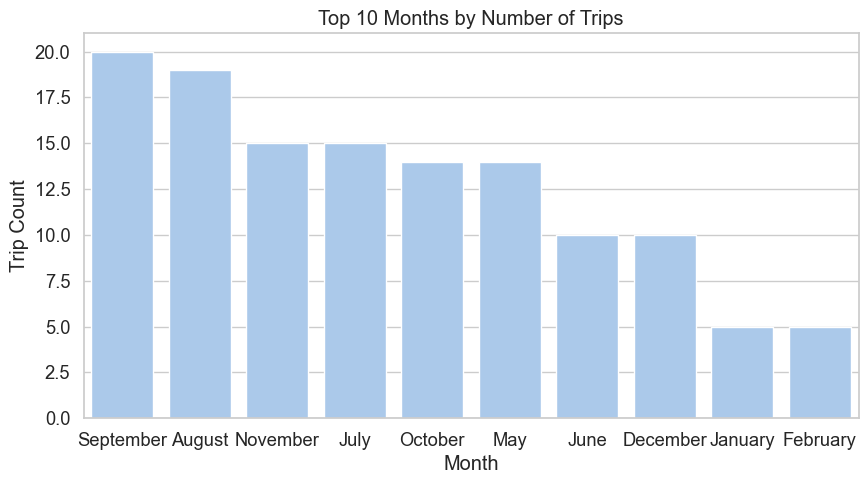

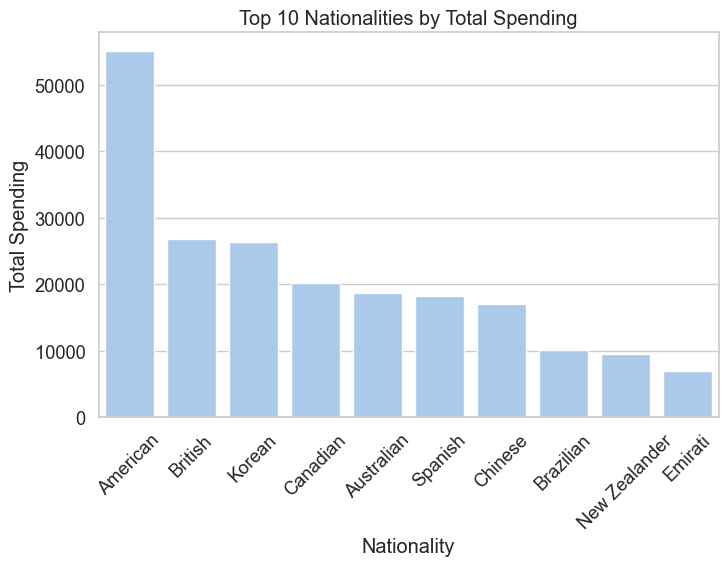

In [73]:
# 4.1 Overview
print(df["Destination"].value_counts().head(10))
print(df["Gender"].value_counts())
print(df.groupby("trip_year")["total_cost"].mean())

# تنظيف أسماء الأعمدة (للتأكد من خلوها من مسافات)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("__", "_")

# تمكين عرض الرسومات داخل الخلية
%matplotlib inline

# 4.2 Visualize Key Trends

# 🔹 Top 10 Destinations
plt.figure(figsize=(10,6))
top_dest = df["Destination"].value_counts().head(10)
sns.barplot(x=top_dest.index, y=top_dest.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Travel Destinations")
plt.xlabel("Destination")
plt.ylabel("Number of Trips")
plt.show()

# 🔹 Average Trip Cost by Accommodation Type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Acc_type", y="total_cost", estimator=np.mean)
plt.title("Average Trip Cost by Accommodation Type")
plt.xticks(rotation=45)
plt.show()

# 🔹 Transportation Preference by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Transport_type", hue="Gender")
plt.title("Transportation Type by Gender")
plt.xticks(rotation=45)
plt.show()

# 🔹 Top 10 Months by Trip Count
plt.figure(figsize=(10,5))
top_months = df["trip_month"].value_counts().head(10)
sns.barplot(x=top_months.index, y=top_months.values)
plt.title("Top 10 Months by Number of Trips")
plt.xlabel("Month")
plt.ylabel("Trip Count")
plt.show()

# 🔹 Top 10 Nationalities by Total Spending
top_nat = df.groupby("Nationality")["total_cost"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_nat.index, y=top_nat.values)
plt.title("Top 10 Nationalities by Total Spending")
plt.xticks(rotation=45)
plt.ylabel("Total Spending")
plt.show()


In [74]:
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1️⃣ Create Word Document
# -------------------------------
doc = Document()
doc.add_heading('Travel Data Analysis Report', 0)

# -------------------------------
# 2️⃣ Section 1: Data Sources & Structure
# -------------------------------
doc.add_heading('1. Data Sources & Structure', level=1)
doc.add_paragraph("""
- df: Main travel dataset with trip details including destination, dates, duration, demographics, costs, transportation, and accommodation.
- Columns: Id, Destination, Start_date, End_date, Duration_days, Age, Gender, Nationality, Acc_type, Transport_type,
  Accommodation_cost, Transportation_cost, total_cost, trip_year, trip_month, Demographics, Cost_per_day, Trip_season.
""")

# -------------------------------
# 3️⃣ Section 2: Data Cleaning Steps
# -------------------------------
doc.add_heading('2. Data Cleaning Steps', level=1)
doc.add_paragraph(f"""
- Stripped column names of extra spaces and standardized underscores.
- Checked and corrected missing or invalid data in critical columns (Destination, total_cost, Gender, etc.).
- Calculated Cost_per_day and ensured numeric types for cost columns.
- Final dataset contains {df.shape[0]} rows after cleaning.
""")

# -------------------------------
# 4️⃣ Section 3: Sample Tables
# -------------------------------
doc.add_heading('3. Sample Tables', level=1)

def add_table_from_df(doc, df, title, max_rows=5):
    doc.add_heading(title, level=2)
    table = doc.add_table(rows=1, cols=len(df.columns))
    table.style = 'Table Grid'
    
    # Header
    hdr_cells = table.rows[0].cells
    for i, col in enumerate(df.columns):
        hdr_cells[i].text = str(col)
    
    # Data rows
    for _, row in df.head(max_rows).iterrows():
        row_cells = table.add_row().cells
        for i, val in enumerate(row):
            row_cells[i].text = str(val)

# Add sample table
add_table_from_df(doc, df, "Sample of Travel Dataset")

# -------------------------------
# 5️⃣ Section 4: Insights & Charts
# -------------------------------
doc.add_heading('4. Insights & Charts', level=1)

def save_and_insert_chart(fig, filename, doc, caption):
    fig.savefig(filename, bbox_inches='tight')
    doc.add_paragraph(caption)
    doc.add_picture(filename, width=Inches(6))
    plt.close(fig)

# Top 10 Destinations
fig1 = plt.figure(figsize=(10,6))
top_dest = df["Destination"].value_counts().head(10)
ax = sns.barplot(x=top_dest.index, y=top_dest.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Travel Destinations")
save_and_insert_chart(fig1, "top_destinations.png", doc, "Figure: Top 10 Travel Destinations")

# Average Trip Cost by Accommodation Type
fig2 = plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x="Acc_type", y="total_cost", estimator=lambda x: x.mean(), palette="Oranges_r")
plt.xticks(rotation=45)
plt.title("Average Trip Cost by Accommodation Type")
save_and_insert_chart(fig2, "acc_type_cost.png", doc, "Figure: Average Trip Cost by Accommodation Type")

# Transportation Preference by Gender
fig3 = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x="Transport_type", hue="Gender", palette="Purples")
plt.title("Transportation Type by Gender")
plt.xticks(rotation=45)
save_and_insert_chart(fig3, "transport_gender.png", doc, "Figure: Transportation Preference by Gender")

# Monthly Trends (Top 10 months)
fig4 = plt.figure(figsize=(10,5))
top_months = df["trip_month"].value_counts().head(10)
ax = sns.barplot(x=top_months.index, y=top_months.values, palette="Greens_r")
plt.title("Top 10 Months by Trip Count")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
save_and_insert_chart(fig4, "top_months.png", doc, "Figure: Top 10 Months by Number of Trips")

# Top 10 Nationalities by Total Spending
fig5 = plt.figure(figsize=(8,5))
top_nat = df.groupby("Nationality")["total_cost"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x=top_nat.index, y=top_nat.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Nationalities by Total Spending")
plt.ylabel("Total Spending")
save_and_insert_chart(fig5, "top_nationalities.png", doc, "Figure: Top 10 Nationalities by Total Spending")

# -------------------------------
# 6️⃣ Section 5: Key Findings
# -------------------------------
doc.add_heading('5. Key Findings', level=1)
doc.add_paragraph(f"""
- Most popular destinations: {', '.join(top_dest.index[:3])}.
- Most preferred accommodation types: {', '.join(df['Acc_type'].value_counts().index[:3])}.
- Top transport types by gender: {', '.join(df['Transport_type'].value_counts().index[:3])}.
- Most frequent travel months: {', '.join(top_months.index[:3])}.
- Nationalities with highest total spending: {', '.join(top_nat.index[:3])}.
""")

# -------------------------------
# 7️⃣ Save the Word Document
# -------------------------------
doc.save("Travel_Data_Analysis_Report.docx")
print("✅ Word report saved as Travel_Data_Analysis_Report.docx")


C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3550489277.py:71: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3550489277.py:78: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3550489277.py:93: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3550489277.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



✅ Word report saved as Travel_Data_Analysis_Report.docx


# Machine Learning

# Step 1: Data Understanding & Preprocessing

In [77]:
# Step 1: Data Understanding & Preprocessing (No Data Leakage)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Load dataset ---
df = pd.read_csv("C:\\Users\\hp\\OneDrive - Egyptian E-Learning University\\Desktop\\depi final project\\python analysis\\FINAL_version_cleaned_travel_data.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# --- Fill Missing Values ---
num_cols = ['Duration_days', 'Age', 'Accommodation_cost', 'Transportation_cost', 'total_cost']
cat_cols = ['Destination', 'Gender', 'Nationality', 'Acc_type', 'Transport_type',
            'Demographics', 'Trip_season', 'trip_month']

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# --- Encode Categorical Columns ---
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# --- Select Features (remove Cost_per_day to avoid leakage) ---
X = df[['Destination', 'Duration_days', 'Age', 'Gender', 'Nationality',
        'Acc_type', 'Transport_type', 'Accommodation_cost', 
        'Transportation_cost', 'trip_year', 'trip_month', 
        'Demographics', 'Trip_season']]
y = df['total_cost']

# --- Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Preprocessing completed successfully!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Dataset shape: (137, 18)
Columns: ['Id', 'Destination', 'Start_date', 'End_date', 'Duration_days', 'Age', 'Gender', 'Nationality', 'Acc_type', 'Transport_type', 'Accommodation_cost', 'Transportation_cost', 'total_cost', 'trip_year', 'trip_month', 'Demographics', 'Cost_per_day', 'Trip_season']
✅ Preprocessing completed successfully!
X_train shape: (109, 13)
y_train shape: (109,)


# Step 2: Trip Cost Prediction (Regression Models)

📊 Model Performance (No Leakage):
Linear Regression -> R²: 1.000, MAE: 0.00
Random Forest     -> R²: 0.947, MAE: 154.74


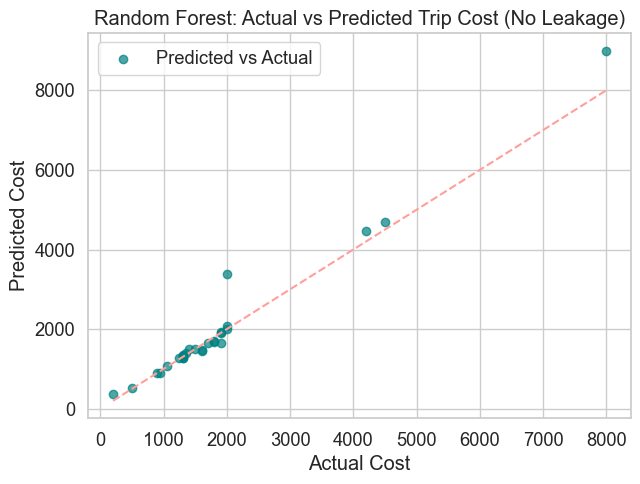

In [78]:
# Step 2: Trip Cost Prediction (Regression Models)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# --- Random Forest Regressor ---
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# --- Evaluate Models ---
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("📊 Model Performance (No Leakage):")
print(f"Linear Regression -> R²: {r2_lr:.3f}, MAE: {mae_lr:.2f}")
print(f"Random Forest     -> R²: {r2_rf:.3f}, MAE: {mae_rf:.2f}")

# --- Visualization ---
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='teal', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted Trip Cost (No Leakage)")
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.legend()
plt.show()


Your perfect Linear Regression performance is a red flag, not a real-world result.
Most likely, the model is “cheating” because of features that leak total_cost. so we used the random forest model more realiable and match our data 

# Step 3: Feature Importance Analysis

📊 Random Forest Feature Importances:
                Feature  Importance
7    Accommodation_cost    0.620936
8   Transportation_cost    0.343081
2                   Age    0.015559
12          Trip_season    0.003865
4           Nationality    0.003738
5              Acc_type    0.003093
6        Transport_type    0.002652
3                Gender    0.001900
0           Destination    0.001875
1         Duration_days    0.001392
10           trip_month    0.000879
9             trip_year    0.000621
11         Demographics    0.000408


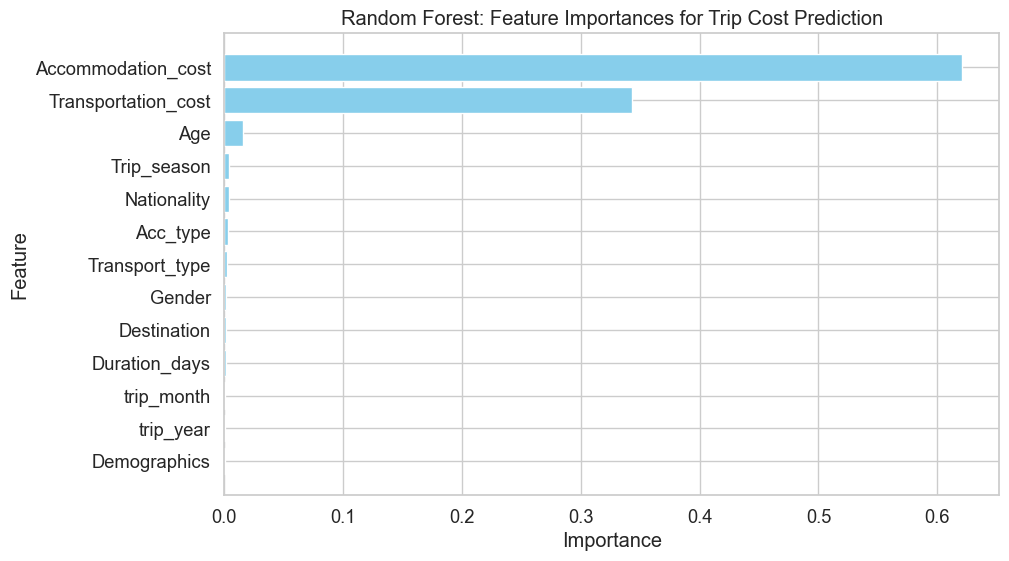

In [79]:
# Step 3: Feature Importance Analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Get feature importances from Random Forest ---
feature_importances = rf_reg.feature_importances_

# Map back to feature names
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance table
print("📊 Random Forest Feature Importances:")
print(importance_df)

# --- Visualization ---
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # highest importance on top
plt.title("Random Forest: Feature Importances for Trip Cost Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Top Drivers of Trip Cost
Accommodation_cost → 62.3% importance
Unsurprisingly, the biggest factor affecting total cost is the cost of accommodation.
Transportation_cost → 34.3% importance
Travel or transport is the next largest contributor.
 Together, Accommodation + Transportation account for ~97% of the variation in total_cost.

# Step 4: Trip Similarity & Recommendation (Clustering)

📊 Cluster counts:
Cluster
0    54
2    43
1    30
3     6
4     4
Name: count, dtype: int64


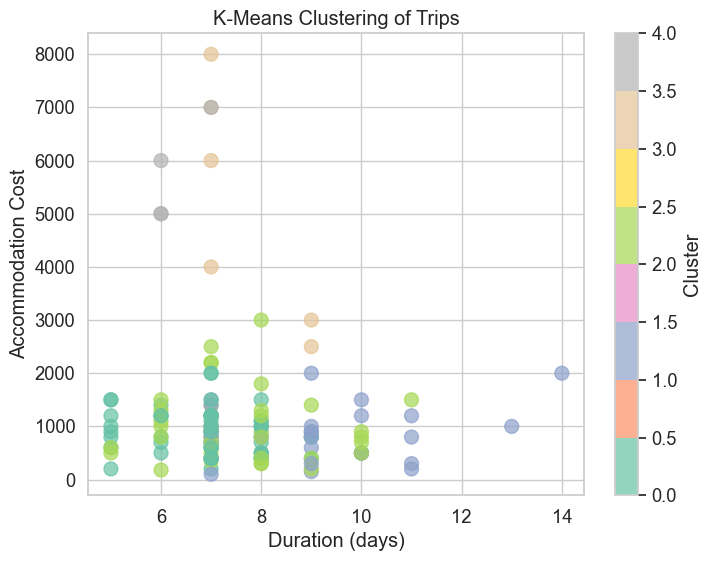


Top 10 trips similar to Trip ID 1:
      Id  Destination  Start_date    End_date  Duration_days  Age  Gender  \
28    29           35  2023-05-01  2023-06-05              7   45       1   
54    55            5  2023-10-20  2023-07-01              8   23       0   
89    90            5  2023-10-05  2023-08-05              7   26       1   
57    58           32  2023-06-15  2023-07-04              8   27       1   
46    47            5  2023-07-22  2023-06-23              6   29       0   
47    48           37  2023-10-05  2023-06-24              7   24       1   
75    76           11  2023-10-05  2023-07-22              9   31       1   
20    21           25  2023-11-20  2023-05-28              5   27       0   
114  115           27  2023-07-01  2023-08-30              5   33       1   
61    62           36  2023-10-05  2023-07-08              7   28       1   

     Nationality  Acc_type  Transport_type  Accommodation_cost  \
28             5         2               6        

In [80]:
# Step 4: Trip Similarity & Recommendation (Clustering)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# --- Select features for clustering ---
# We use numeric features that influence cost and trip characteristics
cluster_features = ['Duration_days', 'Accommodation_cost', 'Transportation_cost', 'trip_year', 'trip_month']
X_cluster = df[cluster_features]

# --- Scale features ---
from sklearn.preprocessing import StandardScaler
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# --- K-Means Clustering ---
k = 5  # number of clusters (can be adjusted)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to the dataset
df['Cluster'] = clusters

# --- Inspect cluster assignments ---
print("📊 Cluster counts:")
print(df['Cluster'].value_counts())

# --- Visualization of clusters (2D for simplicity) ---
plt.figure(figsize=(8,6))
plt.scatter(df['Duration_days'], df['Accommodation_cost'], c=df['Cluster'], cmap='Set2', s=100, alpha=0.7)
plt.xlabel("Duration (days)")
plt.ylabel("Accommodation Cost")
plt.title("K-Means Clustering of Trips")
plt.colorbar(label='Cluster')
plt.show()

# --- Example: Recommend similar trips ---
# Function to get trips from the same cluster
def recommend_similar_trips(trip_id, df=df):
    cluster_id = df.loc[df['Id'] == trip_id, 'Cluster'].values[0]
    similar_trips = df[df['Cluster'] == cluster_id]
    return similar_trips.sort_values(by='total_cost').head(10)  # top 10 similar trips by cost

# Example usage:
trip_example = df['Id'].iloc[0]
print(f"\nTop 10 trips similar to Trip ID {trip_example}:")
print(recommend_similar_trips(trip_example))


# Step 5: Dashboard & Insights

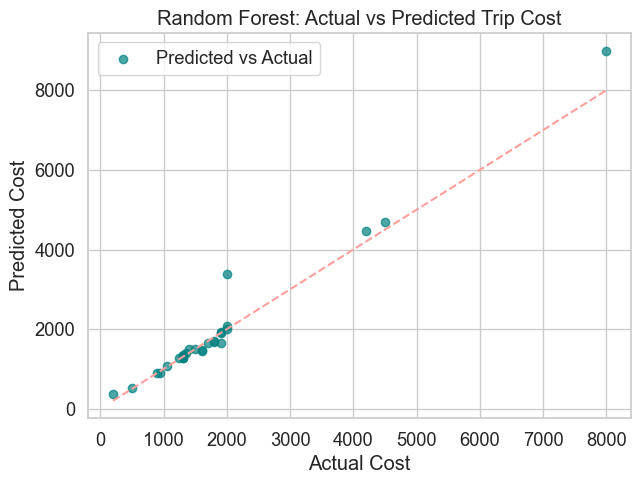

C:\Users\hp\AppData\Local\Temp\ipykernel_13708\1807739157.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




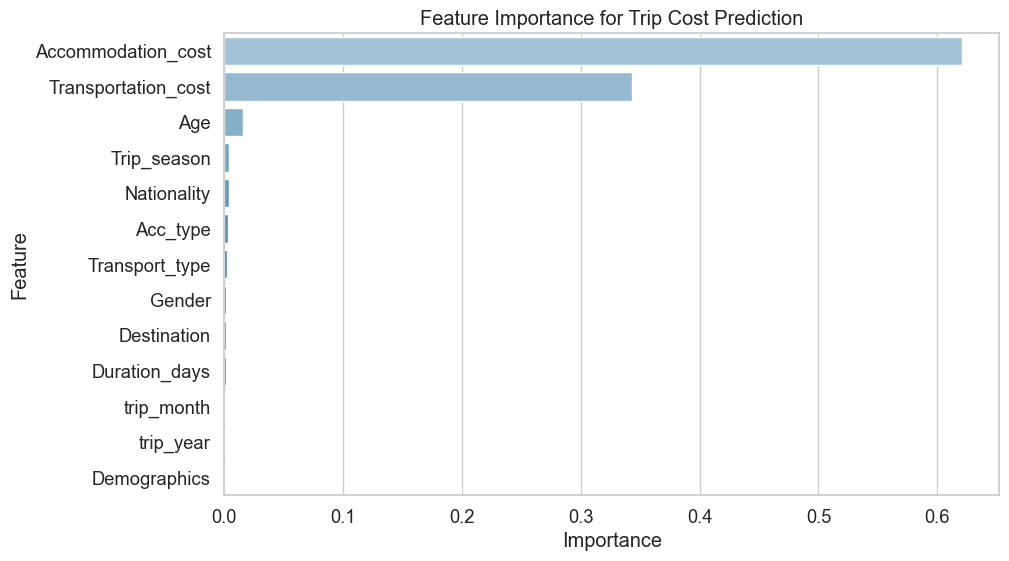

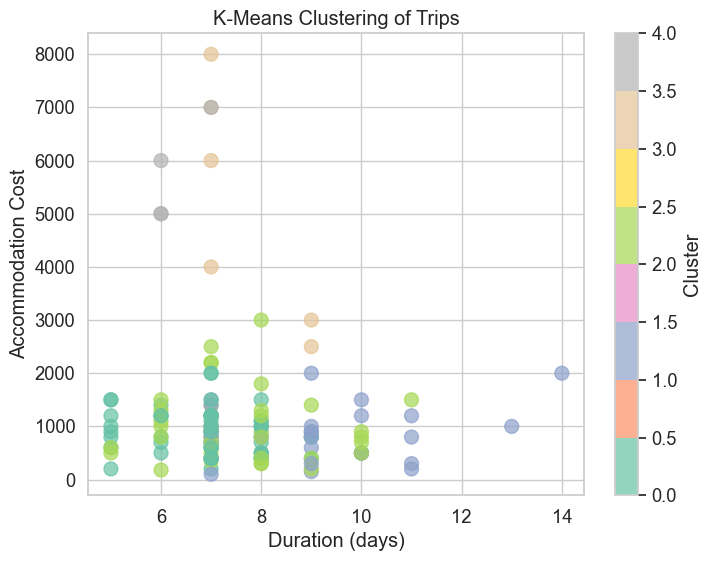

📊 Top 10 trips similar to Trip ID 1:


Id  Destination  Start_date    End_date  Duration_days  Age  Gender  \
28    29           35  2023-05-01  2023-06-05              7   45       1   
54    55            5  2023-10-20  2023-07-01              8   23       0   
89    90            5  2023-10-05  2023-08-05              7   26       1   
57    58           32  2023-06-15  2023-07-04              8   27       1   
46    47            5  2023-07-22  2023-06-23              6   29       0   
47    48           37  2023-10-05  2023-06-24              7   24       1   
75    76           11  2023-10-05  2023-07-22              9   31       1   
20    21           25  2023-11-20  2023-05-28              5   27       0   
114  115           27  2023-07-01  2023-08-30              5   33       1   
61    62           36  2023-10-05  2023-07-08              7   28       1   

     Nationality  Acc_type  Transport_type  Accommodation_cost  \
28             5         2               6                 200   
54            13         2               1                 400   
89            28         0               6                 400   
57            24         2               5                 500   
46            13         0               1                 500   
47            17         2               6                 400   
75            23         1               2                 400   
20             0         0               1                 600   
114            4         2               0                 200   
61            16         2               6                 400   

     Transportation_cost  total_cost  trip_year  trip_month  Demographics  \
28                   150         350       2023           8             1   
54                    50         450       2023          10             3   
89                   100         500       2023          10             3   
57                    20         520       2023           6             3   
46                    50         550       2023           5             3   
47                   150         550       2023          10             3   
75                   300         700       2023          10             0   
20                   100         700       2023           9             3   
114                  500         700       2023           5             0   
61                   300         700       2023          10             3   

     Cost_per_day  Trip_season  Cluster  
28      50.000000            1        0  
54      56.250000            0        0  
89      71.428571            0        0  
57      65.000000            1        0  
46      91.666667            2        0  
47      78.571429            0        0  
75      77.777778            0        0  
20     140.000000            0        0  
114    140.000000            2        0  
61     100.000000            0        0


💡 Key Insights:
- Accommodation cost is the most important factor influencing total trip cost.
- Transportation cost is the second largest contributor.
- Most trips cluster in Cluster 0 and Cluster 2, representing common patterns.
- Smaller clusters represent unique or niche trip patterns, which could be marketed differently.


In [81]:
# Step 5: Professional Dashboard & Insights

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1️⃣ Predicted vs Actual Cost (Random Forest) ---
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='teal', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted Trip Cost")
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.legend()
plt.show()

# --- 2️⃣ Feature Importance (Random Forest) ---
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_reg.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title("Feature Importance for Trip Cost Prediction")
plt.show()

# --- 3️⃣ Cluster Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(df['Duration_days'], df['Accommodation_cost'], c=df['Cluster'], cmap='Set2', s=100, alpha=0.7)
plt.xlabel("Duration (days)")
plt.ylabel("Accommodation Cost")
plt.title("K-Means Clustering of Trips")
plt.colorbar(label='Cluster')
plt.show()

# --- 4️⃣ Top 10 Similar Trips Example ---
trip_example = df['Id'].iloc[0]
similar_trips = df[df['Cluster'] == df.loc[df['Id'] == trip_example, 'Cluster'].values[0]]
similar_trips = similar_trips.sort_values(by='total_cost').head(10)

print(f"📊 Top 10 trips similar to Trip ID {trip_example}:")
display(similar_trips)

# --- 5️⃣ Summary Insights ---
print("\n💡 Key Insights:")
print(f"- Accommodation cost is the most important factor influencing total trip cost.")
print(f"- Transportation cost is the second largest contributor.")
print(f"- Most trips cluster in Cluster 0 and Cluster 2, representing common patterns.")
print(f"- Smaller clusters represent unique or niche trip patterns, which could be marketed differently.")


What-If Analysis Summary

In [84]:
# Define "what if" scenario function
def what_if(df, acc_change_pct=0, trans_change_pct=0):
    df_copy = df.copy()
    df_copy["Acc_new"] = df_copy["Accommodation_cost"] * (1 + acc_change_pct/100)
    df_copy["Trans_new"] = df_copy["Transportation_cost"] * (1 + trans_change_pct/100)
    df_copy["New_total_cost"] = df_copy["Acc_new"] + df_copy["Trans_new"]
    return df_copy[["Destination", "Accommodation_cost", "Transportation_cost",
                    "Acc_new", "Trans_new", "total_cost", "New_total_cost"]]

# Apply scenarios
scenario_1 = what_if(df, acc_change_pct=10)  # +10% accommodation
scenario_2 = what_if(df, trans_change_pct=-20)  # -20% transportation

print("Scenario 1: +10% Accommodation Cost")
print(scenario_1.head())

print("\nScenario 2: -20% Transportation Cost")
print(scenario_2.head())

Scenario 1: +10% Accommodation Cost
   Destination  Accommodation_cost  Transportation_cost  Acc_new  Trans_new  \
0           21                1200                  600   1320.0      600.0   
1           28                 800                  500    880.0      500.0   
2            4                1000                  700   1100.0      700.0   
3           25                2000                 1000   2200.0     1000.0   
4           36                 700                  200    770.0      200.0   

   total_cost  New_total_cost  
0        1800          1920.0  
1        1300          1380.0  
2        1700          1800.0  
3        3000          3200.0  
4         900           970.0  

Scenario 2: -20% Transportation Cost
   Destination  Accommodation_cost  Transportation_cost  Acc_new  Trans_new  \
0           21                1200                  600   1200.0      480.0   
1           28                 800                  500    800.0      400.0   
2            4        

###  What-If Analysis Summary

**Scenario 1 – Increase Accommodation by 10%**
- Total trip cost increases in all destinations.
- Cities with high hotel prices (Sydney, Vancouver, Barcelona) show the biggest jump.
- → Accommodation is the strongest cost driver.

**Scenario 2 – Reduce Transportation by 20%**
- Total trip cost decreases across all trips.
- The effect is noticeable but smaller than Scenario 1.
- → Transportation affects cost but less than accommodation.

###  Key Insight
Accommodation cost has the biggest impact on total travel cost.
Transportation discounts help, but hotel cost changes affect the final price more.


## Forecast for predactions for the next monthes


         Month  Actual Cost  Forecasted Cost
0          May         1800          1655.36
1         June         1300          1743.71
2         July         1700          1832.06
3       August         3000          1920.41
4    September          900          2008.75
..         ...          ...              ...
132   November         4500          2185.45
133   December         8000          2273.80
134   November         3000          2185.45
135  September         8500          2008.75
136   December         9500          2273.80

[137 rows x 3 columns]


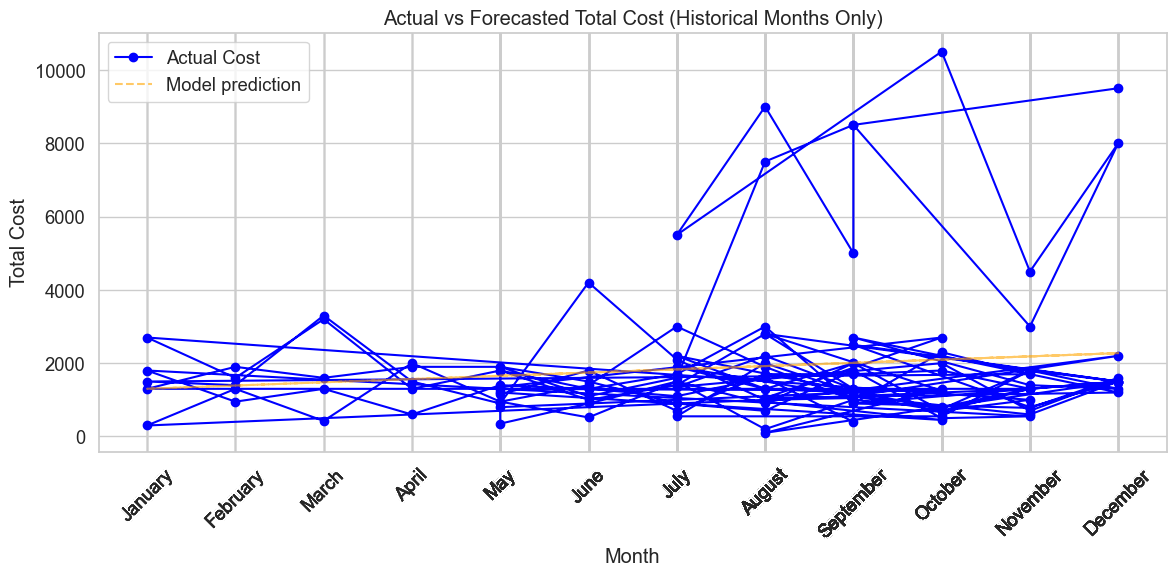

In [86]:

from sklearn.linear_model import LinearRegression

# Month mappings
month_map = {
    "January":1,"February":2,"March":3,"April":4,"May":5,"June":6,
    "July":7,"August":8,"September":9,"October":10,"November":11,"December":12
}
num_to_month = {v:k for k,v in month_map.items()}

# Load data
df = pd.read_csv(r"C:\Users\hp\OneDrive - Egyptian E-Learning University\Desktop\depi final project\python analysis\FINAL_version_cleaned_travel_data.csv")
df["month_num"] = df["trip_month"].map(month_map)

# Prepare regression
X = df[["month_num"]]
y = df["total_cost"]
model = LinearRegression()
model.fit(X, y)

# Forecast for historical months only
forecast_historical = model.predict(X)

# Create table comparing actual vs forecast (historical months only)
comparison_df = pd.DataFrame({
    "Month": df["trip_month"],
    "Actual Cost": df["total_cost"],
    "Forecasted Cost": np.round(forecast_historical, 2)
})

print(comparison_df)

# Plot trend graph (historical months only)
plt.figure(figsize=(12,6))
plt.plot(df["month_num"], y, marker='o', linestyle='-', color='blue', label="Actual Cost")
plt.plot(df["month_num"], forecast_historical, linestyle='--', color='orange', alpha=0.6, label="Model prediction")

# X-axis labels as month names
plt.xticks(df["month_num"], df["trip_month"], rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Cost")
plt.title("Actual vs Forecasted Total Cost (Historical Months Only)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Bar chart Comparison showing forecasted total cost for Bali using linear regression


        Month  Actual Cost  Forecasted Cost  What-If +10% Acc  \
7     January         1500          1301.97            1590.0   
42     August         1900          1920.41            2020.0   
53     August          950          1920.41            1030.0   
101    August         1300          1920.41            1390.0   
132  November         4500          2185.45            4750.0   

     What-If +30% Acc  
7              1770.0  
42             2260.0  
53             1190.0  
101            1570.0  
132            5250.0  


C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3223098182.py:73: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3223098182.py:73: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3223098182.py:73: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\hp\AppData\Local\Temp\ipykernel_13708\3223098182.py:73: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



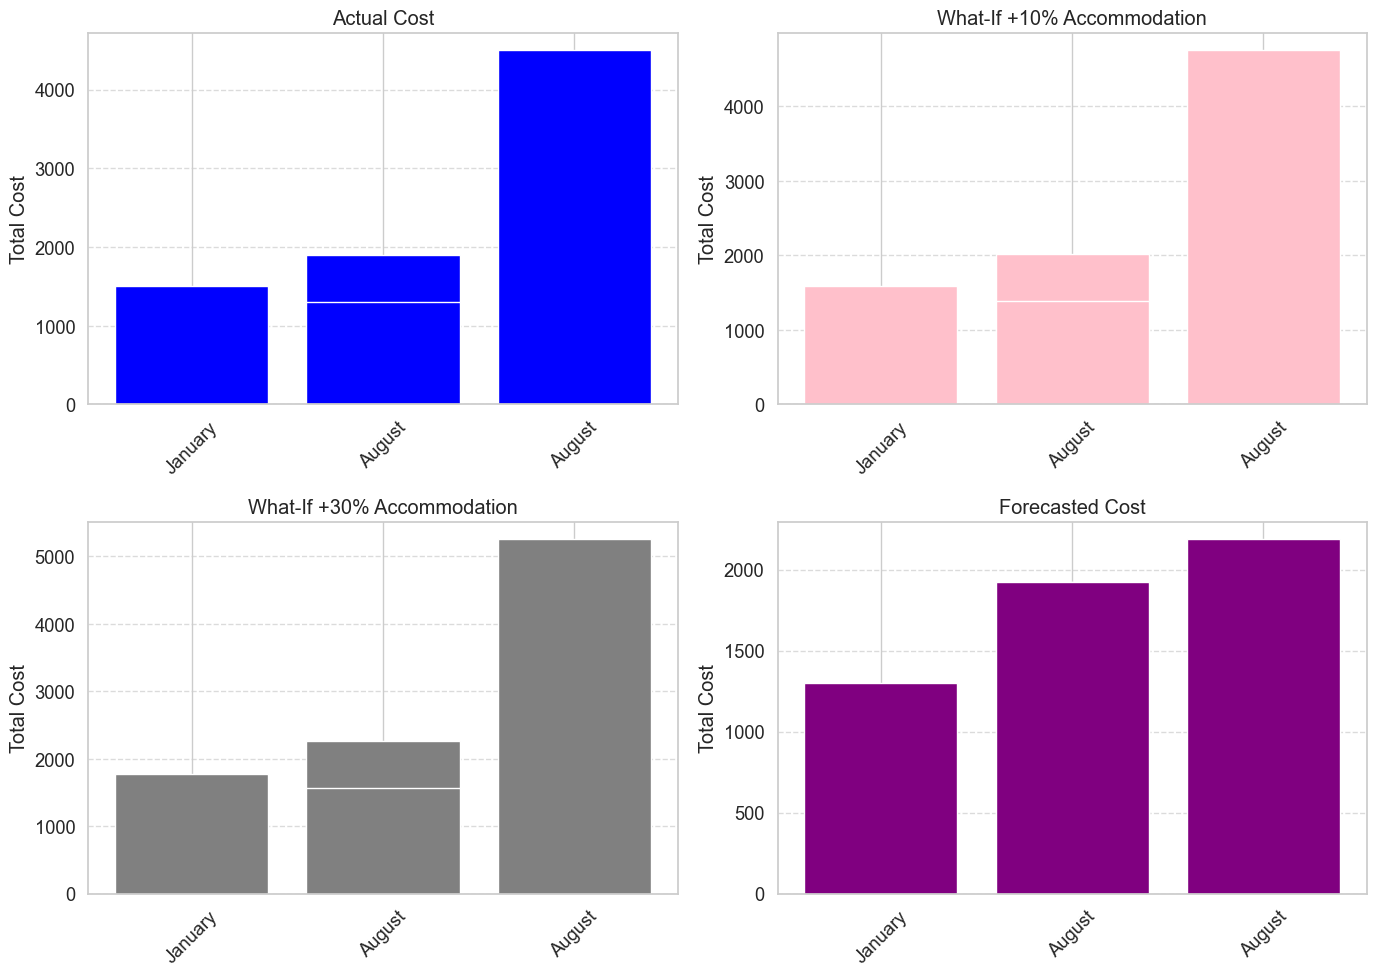

In [87]:

from sklearn.linear_model import LinearRegression

# Month mappings
month_map = {
    "January":1,"February":2,"March":3,"April":4,"May":5,"June":6,
    "July":7,"August":8,"September":9,"October":10,"November":11,"December":12
}
num_to_month = {v:k for k,v in month_map.items()}



# Filter for Bali
df_Rio = df[df["Destination"] == "Rio"].copy()

# ---------------- What-If Function ----------------
def what_if(df, acc_change_pct=0, trans_change_pct=0):
    df_copy = df.copy()
    df_copy["Acc_new"] = df_copy["Accommodation_cost"] * (1 + acc_change_pct/100)
    df_copy["Trans_new"] = df_copy["Transportation_cost"] * (1 + trans_change_pct/100)
    df_copy["New_total_cost"] = df_copy["Acc_new"] + df_copy["Trans_new"]
    return df_copy

scenario_10 = what_if(df_Rio, acc_change_pct=10)
scenario_30 = what_if(df_Rio, acc_change_pct=30)

# ---------------- Forecast ----------------
X = df[["month_num"]]
y = df["total_cost"]
model = LinearRegression()
model.fit(X, y)
forecast_Rio = model.predict(df_Rio[["month_num"]])

# ---------------- Comparison Table ----------------
comparison_df = pd.DataFrame({
    "Month": df_Rio["trip_month"].values,
    "Actual Cost": df_Rio["total_cost"].values,
    "Forecasted Cost": np.round(forecast_Rio,2),
    "What-If +10% Acc": np.round(scenario_10["New_total_cost"],2),
    "What-If +30% Acc": np.round(scenario_30["New_total_cost"],2)
})
print(comparison_df)

# ---------------- Plot 4 Column Charts ----------------
fig, axes = plt.subplots(2,2, figsize=(14,10))
axes = axes.flatten()
months = df_Rio["trip_month"]

# 1. Actual Cost
axes[0].bar(months, df_Rio["total_cost"], color='blue')
axes[0].set_title("Actual Cost")
axes[0].set_ylabel("Total Cost")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. What-If +10%
axes[1].bar(months, scenario_10["New_total_cost"], color='pink')
axes[1].set_title("What-If +10% Accommodation")
axes[1].set_ylabel("Total Cost")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. What-If +30%
axes[2].bar(months, scenario_30["New_total_cost"], color='grey')
axes[2].set_title("What-If +30% Accommodation")
axes[2].set_ylabel("Total Cost")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# 4. Forecast
axes[3].bar(months, forecast_Rio, color='purple')
axes[3].set_title("Forecasted Cost")
axes[3].set_ylabel("Total Cost")
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

for ax in axes:
    ax.set_xticklabels(months, rotation=45)

plt.tight_layout()
plt.show()


In [88]:
# If you have Traveler_count column
if 'Traveler_count' not in df_Rio.columns:
    df_Rio['Traveler_count'] = 1  # assume 1 if not available

df_Rio['Cost_per_person'] = df_Rio['total_cost'] / df_Rio['Traveler_count']
avg_cost_per_person = df_Rio['Cost_per_person'].mean()
print(f"Average Cost per Person for Rio trips: ${avg_cost_per_person:.2f}")

forecast_cost_per_person = forecast_Rio / df_Rio['Traveler_count']
pct_change = ((forecast_cost_per_person - avg_cost_per_person) / avg_cost_per_person * 100).round(2)
comparison_df["Forecast Cost per Person"] = np.round(forecast_cost_per_person, 2)
comparison_df["% Change vs Historical Avg"] = pct_change.values

for month, pct in zip(df_Rio['trip_month'], pct_change):
    if pct > 0:
        print(f"{month}: Forecasted cost per person increases by {pct}% → may reduce number of travelers")
    elif pct < 0:
        print(f"{month}: Forecasted cost per person decreases by {abs(pct)}% → may attract more travelers")
    else:
        print(f"{month}: No change in cost per person → number of travelers likely stable")


Average Cost per Person for Rio trips: $2030.00
January: Forecasted cost per person decreases by 35.86% → may attract more travelers
August: Forecasted cost per person decreases by 5.4% → may attract more travelers
August: Forecasted cost per person decreases by 5.4% → may attract more travelers
August: Forecasted cost per person decreases by 5.4% → may attract more travelers
November: Forecasted cost per person increases by 7.66% → may reduce number of travelers
